In [2]:
import os
import pandas as pd
import numpy as np
import pandas_profiling as pdp
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [3]:
wd = '/Users/ewenwang/Documents/practice_data'
os.chdir(wd)

file_train = 'train.tsv'
file_test = 'test.tsv'

train = pd.read_table(file_train)
test = pd.read_table(file_test)

In [5]:
pdp.ProfileReport(train.sample(round(train.shape[0]*.01)))

Number of variables,9
Number of observations,14825
Total Missing (%),4.8%
Total size in memory,1.0 MiB
Average record size in memory,72.0 B
Numeric,4
Categorical,4
Date,0
Text (Unique),0
Rejected,1
Distinct count,886


In [7]:
#HANDLE MISSING VALUES
print("Handling missing values...")
def handle_missing(dataset):
    dataset.category_name.fillna(value="missing", inplace=True)
    dataset.brand_name.fillna(value="missing", inplace=True)
    dataset.item_description.fillna(value="missing", inplace=True)
    return (dataset)

train = handle_missing(train)
test = handle_missing(test)

Handling missing values...


In [8]:
#PROCESS CATEGORICAL DATA
print("Handling categorical variables...")
le = LabelEncoder()

le.fit(np.hstack([train.category_name, test.category_name]))
train.category_name = le.transform(train.category_name)
test.category_name = le.transform(test.category_name)

le.fit(np.hstack([train.brand_name, test.brand_name]))
train.brand_name = le.transform(train.brand_name)
test.brand_name = le.transform(test.brand_name)
del le

train.head(3)

Handling categorical variables...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...


In [10]:
#PROCESS TEXT: RAW
print("Text to seq process...")
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.item_description.str.lower(), train.name.str.lower()])

print("   Fitting tokenizer...")
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
print("   Transforming text to seq...")

train["seq_item_description"] = tok_raw.texts_to_sequences(train.item_description.str.lower())
test["seq_item_description"] = tok_raw.texts_to_sequences(test.item_description.str.lower())
train["seq_name"] = tok_raw.texts_to_sequences(train.name.str.lower())
test["seq_name"] = tok_raw.texts_to_sequences(test.name.str.lower())
train.head(3)

Text to seq process...


Using TensorFlow backend.


   Fitting tokenizer...
   Transforming text to seq...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet,"[12, 68, 79]","[3852, 8823, 6896, 208, 84, 6, 155]"
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113...","[10760, 25565, 16369, 2627]"
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...,"[604, 60, 9, 4, 5347, 11, 192, 1, 4, 886, 1290...","[7634, 10563, 666]"


In [24]:
from collections import Counter

sample = train.sample(n = 10)
sample['seq_name'].apply(Counter)
pd.DataFrame.from_records(sample).fillna(value=0)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
0,1399756,Lululemon bra 4,1,1166,2872,20.0,1,New Retail:[rm],"[5, 230, 21]","[295, 149, 47]"
1,250091,Orange Maxi,1,1186,3431,14.0,0,Old Navy orange maxi dress size large tall new...,"[376, 193, 396, 773, 82, 6, 73, 516, 5, 9, 61]","[396, 773]"
2,1101973,NWOB Ugg 100% Authentic Mini boot SZ 7,2,1227,4841,76.0,0,"Ugg Mini black 5"" shaft, NWOB perfect conditio...","[1060, 211, 24, 34, 3708, 7212, 93, 17, 36, 22...","[7212, 1060, 113, 100, 211, 735, 223, 64]"
3,156444,Xsmall pink palm tree pants and tank,1,1219,3512,61.0,0,No description yet,"[12, 68, 79]","[2433, 25, 2641, 1528, 179, 1, 195]"
4,998697,Platform Combat Boots,3,1227,5265,39.0,0,Black platform boots with a 3inch heel. Unlace...,"[24, 2173, 206, 9, 4, 17880, 715, 59137, 8, 54...","[2173, 2697, 206]"
5,1057088,Before I Fall,2,857,5265,9.0,0,*Bought but never read*,"[201, 38, 36, 384]","[161, 15, 588]"
6,96394,Black Sip By Swell Water bottles metal,1,493,5265,19.0,1,Keeps drink cold or hot. Black 15oz As pictured.,"[1687, 2793, 890, 23, 349, 24, 10444, 55, 564]","[24, 8520, 106, 9312, 311, 928, 510]"
7,138168,Grey Harvard Sweatshirt,4,816,972,30.0,0,comfortable and warm harvard sweatshirt. It is...,"[334, 1, 462, 14501, 560, 19, 10, 4, 625, 30, ...","[187, 14501, 560]"
8,1066742,Toddler Van's,3,593,5265,8.0,0,Toddler Vans size 7. Good used condition. Grey...,"[420, 695, 6, 64, 58, 31, 17, 187, 9, 66, 2002...","[420, 16617]"
9,703866,White Converse,4,1228,1144,36.0,0,Just cleaned them!,"[87, 1100, 119]","[59, 644]"


In [11]:
#SEQUENCES VARIABLES ANALYSIS
max_name_seq = np.max([np.max(train.seq_name.apply(lambda x: len(x))), np.max(test.seq_name.apply(lambda x: len(x)))])
max_seq_item_description = np.max([np.max(train.seq_item_description.apply(lambda x: len(x)))
                                   , np.max(test.seq_item_description.apply(lambda x: len(x)))])
print("max name seq "+str(max_name_seq))
print("max item desc seq "+str(max_seq_item_description))

max name seq 17
max item desc seq 269


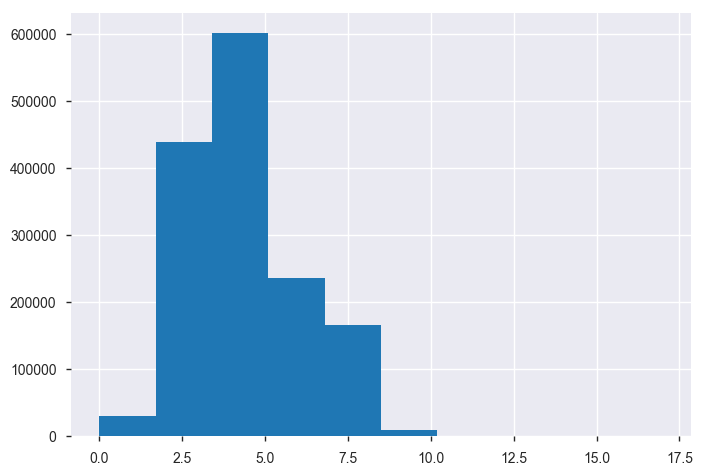

In [12]:
train.seq_name.apply(lambda x: len(x)).hist()

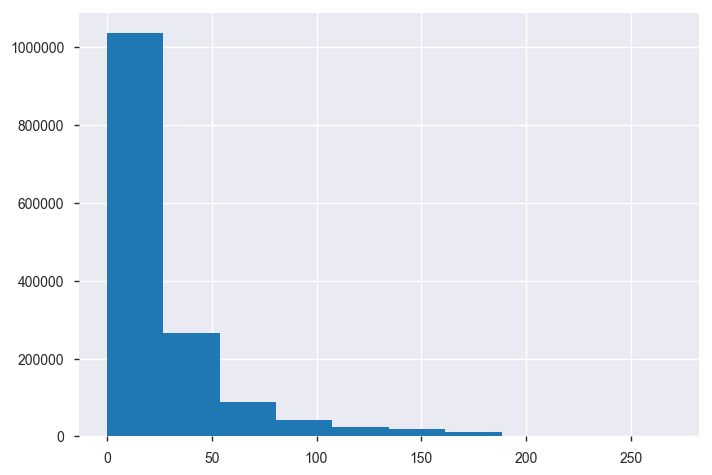

In [13]:
train.seq_item_description.apply(lambda x: len(x)).hist()

In [14]:
#EMBEDDINGS MAX VALUE
#Base on the histograms, we select the next lengths
MAX_NAME_SEQ = 10
MAX_ITEM_DESC_SEQ = 75
MAX_TEXT = np.max([np.max(train.seq_name.max())
                   , np.max(test.seq_name.max())
                  , np.max(train.seq_item_description.max())
                  , np.max(test.seq_item_description.max())])+2
MAX_CATEGORY = np.max([train.category_name.max(), test.category_name.max()])+1
MAX_BRAND = np.max([train.brand_name.max(), test.brand_name.max()])+1
MAX_CONDITION = np.max([train.item_condition_id.max(), test.item_condition_id.max()])+1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4000390>]], dtype=object)

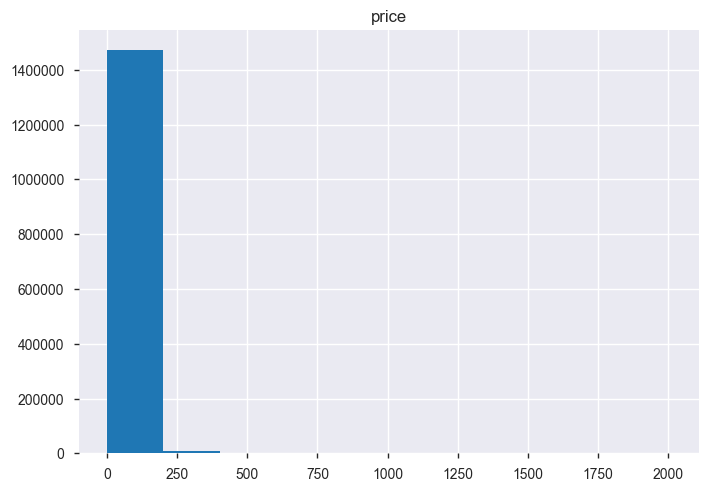

In [15]:
# #SCALE target variable
# train["target"] = np.log(train.price+1)
# target_scaler = MinMaxScaler(feature_range=(-1, 1))
# train["target"] = target_scaler.fit_transform(train.target.reshape(-1,1))
pd.DataFrame(train.price).hist()

In [16]:
#EXTRACT DEVELOPTMENT TEST
seed = 123
test_size = 0.3
dtrain, dvalid = train_test_split(train, test_size = test_size, random_state=seed)
print(dtrain.shape)
print(dvalid.shape)

(1037774, 10)
(444761, 10)


In [18]:
dtrain.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
1138409,1138409,TI 83 Plus Calculator Texas Instruments,2,1310,5265,27.0,1,TI-83+ like new calculator. Used for one summe...,"[4171, 6184, 51, 5, 3146, 31, 3, 46, 449, 946,...","[4171, 6184, 120, 3146, 2974, 6778]"
1021,1021,Jockey Scrub Pants,3,863,5265,18.0,0,Large Jockey scrub pants,"[73, 12763, 892, 179]","[12763, 892, 179]"
677426,677426,"Snap Button ""Cherries"" Necklace/ Buttons",1,1204,5265,18.0,1,"Noosa Style Snap Button Necklace Chain Is 20"" ...","[21636, 183, 1094, 340, 257, 522, 10, 325, 7, ...","[1094, 340, 11360, 257, 854]"
1432232,1432232,Medical surgical nursing,3,856,5265,37.0,0,Medical surgical nursing book 9th edition ! In...,"[4440, 2360, 2192, 544, 15098, 370, 7, 382, 58...","[4440, 2360, 2192]"
422504,422504,ID holder and lanyard,3,1299,3512,14.0,0,Used but good condition/ I used this for only ...,"[31, 38, 58, 17, 15, 31, 29, 3, 50, 46, 968, 881]","[1325, 605, 1, 1112]"
